# Create perturbed $^{239}$Pu thermal FY files using CEA evaluation

In [1]:
import sandy
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join, dirname
import pandas as pd
import numpy as np
import random, sys

## Extract FYs and covariance data for Pu239 thermal fission

If you don't find these files, download them from the [NEA GITLAB repository](https://git.oecd-nea.org/databank/nds/jeff/jeff-lab/fission-yields-pu-239-th).

In [2]:
path = join(dirname(sandy.__file__), 'appendix', 'fission_yields')

file_eval = r"jeff-4t3_cea_pu9_cons_28-09-2023.stn"
file_cov = r"jeff-4t3_cea_pu9th_cons_28-09-2023_ind_corr"
tape = sandy.Endf6.from_file(join(path, file_eval))
nfpy = sandy.Fy.from_endf6(tape)

In [3]:
idx = nfpy.data.query(f"E==0.0253 & MT==454").index
ifyth = nfpy.data.loc[idx]

corr = pd.read_csv(join(path, file_cov), sep=r"\s+", header=None)
u = np.triu(corr, k=1)
corr = u + u.T + np.diag(np.diag(corr))                                                # must do this because the matrix is not symmetric
acov = sandy.corr2cov(corr, ifyth.DFY.values)                                          # absolute covariance matrix
cov = np.divide(acov, ifyth.FY.values.reshape(-1, 1) @ ifyth.FY.values.reshape(1, -1)) # convert to relative terms
cov = sandy.CategoryCov(pd.DataFrame(cov, index=ifyth.ZAP.values, columns=ifyth.ZAP.values))

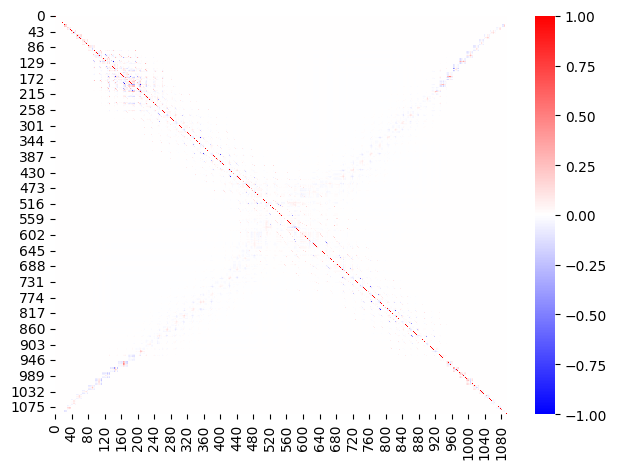

In [4]:
fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, cmap="bwr", ax=ax)
fig.tight_layout()

## Generate perturbation coefficients and write them to file

In [5]:
seed = random.randrange(2**32 - 1)    # create a seed
seed = 1444271357                     # or use always the same
nsmp = 1000                           # sample size
smp = cov.sampling(nsmp, seed=seed)

In [6]:
with pd.ExcelWriter('PERT_94239TH_MF8_MT454.xlsx') as writer:
    pd.DataFrame([[seed]]).to_excel(writer, sheet_name='SEED', columns=None, index=False)
    smp.data.to_excel(writer, sheet_name='IFY_TH')

## Read coefficients from perturbation file and generate random FY ENDF-6 files

Skip the part above if you already have the file of perturbations.

In [7]:
smp = pd.read_excel("PERT_94239TH_MF8_MT454.xlsx", sheet_name="IFY_TH", index_col=0)
smp = sandy.Samples(smp)

In [8]:
idx_ify = nfpy.data.query(f"E==0.0253 & MT==454").index
idx_cfy = nfpy.data.query(f"E==0.0253 & MT==459").index

In [9]:
tape_rdd = sandy.get_endf6_file("jeff_33", "decay", "all")
rdd = sandy.DecayData.from_endf6(tape_rdd)  # this can take a while

In [10]:
smp_min = 0   # write ENDF-6 file only in the sample range [smp_min, smp_max]
smp_max = 99
file_template = "pu239_fy_cea_cons_{}.jeff4t3"
for ismp in range(smp_min, smp_max+1):
    file = file_template.format(ismp)
    f = sandy.Fy(nfpy.data.copy())
    f.data.loc[idx_ify, "DFY"] = f.data.loc[idx_ify, "FY"]            # just for me, i copy the original IFYs where uncertainties should be, so i can compare them to the perturbed ones (anyways I don't use uncertainties)
    f.data.loc[idx_cfy, "DFY"] = f.data.loc[idx_cfy, "FY"]            # same but for CFYs
    f.data.loc[idx_ify, "FY"] *= smp.data[ismp].values                # IMPORTANT, this does not update the CFYs, which in random ENDF-6 file are inconsistent with the perturbed IFYs
    # f = f.apply_qmatrix(942390, 0.0253, rdd, keep_fy_index=True)      # Run this if you want to update the CFYs (slower), or else comment it out
    print(f"writing file '{file}'...")
    f.to_endf6(tape).to_file(file)

writing file 'pu239_fy_cea_cons_0.jeff4t3'...


writing file 'pu239_fy_cea_cons_1.jeff4t3'...


writing file 'pu239_fy_cea_cons_2.jeff4t3'...


writing file 'pu239_fy_cea_cons_3.jeff4t3'...


writing file 'pu239_fy_cea_cons_4.jeff4t3'...


writing file 'pu239_fy_cea_cons_5.jeff4t3'...


writing file 'pu239_fy_cea_cons_6.jeff4t3'...


writing file 'pu239_fy_cea_cons_7.jeff4t3'...


writing file 'pu239_fy_cea_cons_8.jeff4t3'...


writing file 'pu239_fy_cea_cons_9.jeff4t3'...


writing file 'pu239_fy_cea_cons_10.jeff4t3'...


writing file 'pu239_fy_cea_cons_11.jeff4t3'...


writing file 'pu239_fy_cea_cons_12.jeff4t3'...


writing file 'pu239_fy_cea_cons_13.jeff4t3'...


writing file 'pu239_fy_cea_cons_14.jeff4t3'...


writing file 'pu239_fy_cea_cons_15.jeff4t3'...


writing file 'pu239_fy_cea_cons_16.jeff4t3'...


writing file 'pu239_fy_cea_cons_17.jeff4t3'...


writing file 'pu239_fy_cea_cons_18.jeff4t3'...


writing file 'pu239_fy_cea_cons_19.jeff4t3'...


writing file 'pu239_fy_cea_cons_20.jeff4t3'...


writing file 'pu239_fy_cea_cons_21.jeff4t3'...


writing file 'pu239_fy_cea_cons_22.jeff4t3'...


writing file 'pu239_fy_cea_cons_23.jeff4t3'...


writing file 'pu239_fy_cea_cons_24.jeff4t3'...


writing file 'pu239_fy_cea_cons_25.jeff4t3'...


writing file 'pu239_fy_cea_cons_26.jeff4t3'...


writing file 'pu239_fy_cea_cons_27.jeff4t3'...


writing file 'pu239_fy_cea_cons_28.jeff4t3'...


writing file 'pu239_fy_cea_cons_29.jeff4t3'...


writing file 'pu239_fy_cea_cons_30.jeff4t3'...


writing file 'pu239_fy_cea_cons_31.jeff4t3'...


writing file 'pu239_fy_cea_cons_32.jeff4t3'...


writing file 'pu239_fy_cea_cons_33.jeff4t3'...


writing file 'pu239_fy_cea_cons_34.jeff4t3'...


writing file 'pu239_fy_cea_cons_35.jeff4t3'...


writing file 'pu239_fy_cea_cons_36.jeff4t3'...


writing file 'pu239_fy_cea_cons_37.jeff4t3'...


writing file 'pu239_fy_cea_cons_38.jeff4t3'...


writing file 'pu239_fy_cea_cons_39.jeff4t3'...


writing file 'pu239_fy_cea_cons_40.jeff4t3'...


writing file 'pu239_fy_cea_cons_41.jeff4t3'...


writing file 'pu239_fy_cea_cons_42.jeff4t3'...


writing file 'pu239_fy_cea_cons_43.jeff4t3'...


writing file 'pu239_fy_cea_cons_44.jeff4t3'...


writing file 'pu239_fy_cea_cons_45.jeff4t3'...


writing file 'pu239_fy_cea_cons_46.jeff4t3'...


writing file 'pu239_fy_cea_cons_47.jeff4t3'...


writing file 'pu239_fy_cea_cons_48.jeff4t3'...


writing file 'pu239_fy_cea_cons_49.jeff4t3'...


writing file 'pu239_fy_cea_cons_50.jeff4t3'...


writing file 'pu239_fy_cea_cons_51.jeff4t3'...


writing file 'pu239_fy_cea_cons_52.jeff4t3'...


writing file 'pu239_fy_cea_cons_53.jeff4t3'...


writing file 'pu239_fy_cea_cons_54.jeff4t3'...


writing file 'pu239_fy_cea_cons_55.jeff4t3'...


writing file 'pu239_fy_cea_cons_56.jeff4t3'...


writing file 'pu239_fy_cea_cons_57.jeff4t3'...


writing file 'pu239_fy_cea_cons_58.jeff4t3'...


writing file 'pu239_fy_cea_cons_59.jeff4t3'...


writing file 'pu239_fy_cea_cons_60.jeff4t3'...


writing file 'pu239_fy_cea_cons_61.jeff4t3'...


writing file 'pu239_fy_cea_cons_62.jeff4t3'...


writing file 'pu239_fy_cea_cons_63.jeff4t3'...


writing file 'pu239_fy_cea_cons_64.jeff4t3'...


writing file 'pu239_fy_cea_cons_65.jeff4t3'...


writing file 'pu239_fy_cea_cons_66.jeff4t3'...


writing file 'pu239_fy_cea_cons_67.jeff4t3'...


writing file 'pu239_fy_cea_cons_68.jeff4t3'...


writing file 'pu239_fy_cea_cons_69.jeff4t3'...


writing file 'pu239_fy_cea_cons_70.jeff4t3'...


writing file 'pu239_fy_cea_cons_71.jeff4t3'...


writing file 'pu239_fy_cea_cons_72.jeff4t3'...


writing file 'pu239_fy_cea_cons_73.jeff4t3'...


writing file 'pu239_fy_cea_cons_74.jeff4t3'...


writing file 'pu239_fy_cea_cons_75.jeff4t3'...


writing file 'pu239_fy_cea_cons_76.jeff4t3'...


writing file 'pu239_fy_cea_cons_77.jeff4t3'...


writing file 'pu239_fy_cea_cons_78.jeff4t3'...


writing file 'pu239_fy_cea_cons_79.jeff4t3'...


writing file 'pu239_fy_cea_cons_80.jeff4t3'...


writing file 'pu239_fy_cea_cons_81.jeff4t3'...


writing file 'pu239_fy_cea_cons_82.jeff4t3'...


writing file 'pu239_fy_cea_cons_83.jeff4t3'...


writing file 'pu239_fy_cea_cons_84.jeff4t3'...


writing file 'pu239_fy_cea_cons_85.jeff4t3'...


writing file 'pu239_fy_cea_cons_86.jeff4t3'...


writing file 'pu239_fy_cea_cons_87.jeff4t3'...


writing file 'pu239_fy_cea_cons_88.jeff4t3'...


writing file 'pu239_fy_cea_cons_89.jeff4t3'...


writing file 'pu239_fy_cea_cons_90.jeff4t3'...


writing file 'pu239_fy_cea_cons_91.jeff4t3'...


writing file 'pu239_fy_cea_cons_92.jeff4t3'...


writing file 'pu239_fy_cea_cons_93.jeff4t3'...


writing file 'pu239_fy_cea_cons_94.jeff4t3'...


writing file 'pu239_fy_cea_cons_95.jeff4t3'...


writing file 'pu239_fy_cea_cons_96.jeff4t3'...


writing file 'pu239_fy_cea_cons_97.jeff4t3'...


writing file 'pu239_fy_cea_cons_98.jeff4t3'...


writing file 'pu239_fy_cea_cons_99.jeff4t3'...


## Compare sample estimates of mass yields with deterministic uncertainty propagation (sandwich formula) 

In [11]:
mfy = {}
for ismp in range(smp_min, smp_max+1):
    mfy[ismp] = sandy.Fy.from_endf6(sandy.Endf6.from_file(f"pu239_fy_cea_cons_{ismp}.jeff4t3")).get_mass_yield(zam=942390, e=0.0253)
mfy = pd.DataFrame(mfy).rename_axis("SMP", axis=1)

S = sandy.Fy(nfpy.data.query("MT==454 and E==0.0253")).get_mass_yield_sensitivity()
C = pd.DataFrame(acov, index=ifyth.ZAP.values, columns=ifyth.ZAP.values)
cov_mfy = sandy.CategoryCov(S @ C @ S.T)

mu = nfpy.get_mass_yield(zam=942390, e=0.0253)
sigma = cov_mfy.get_std()

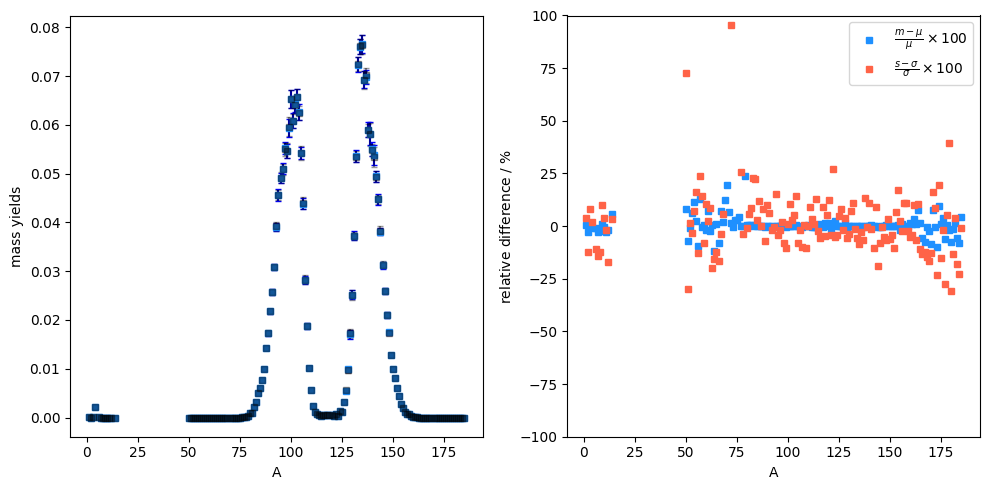

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

ax = axs[0]
ax.errorbar(x=mfy.index, y=mfy.T.mean(), yerr=mfy.T.std(), marker="s", ms=4, linestyle="none", capsize=2, ecolor="blue", color="dodgerblue", label="sample estimate")
ax.errorbar(x=mu.index, y=mu.values, yerr=sigma.values, marker="s", ms=4, linestyle="none", capsize=2, ecolor="k", color="k", alpha=.4, label="original data")
ax.set(ylabel="mass yields", xlabel="A")

ax = axs[1]
diff_mean = (mfy.T.mean() / mu  - 1) * 100
diff_std = (mfy.T.std() / sigma - 1) * 100
ax.errorbar(x=diff_mean.index, y=diff_mean.values, marker="s", ms=4, linestyle="none", color="dodgerblue", label="$\\frac{m- \\mu}{\\mu} \\times 100$")
ax.errorbar(x=diff_std.index, y=diff_std.values, marker="s", ms=4, linestyle="none", color="tomato", label="$\\frac{s- \\sigma}{\\sigma} \\times 100$")
ax.set(ylim=[-100, 100], ylabel="relative difference / $\\%$", xlabel="A")
ax.legend()
fig.tight_layout()